<a href="https://colab.research.google.com/github/algoritmosdenegociacion/modulo2/blob/main/M2_L3_An%C3%A1lisis_T%C3%A9cnico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de Negociación basados en Machine Learning - Módulo 2
- Sergio Andrés Cabrales, Ph.D., Universidad de los Andes 
- Juan Pablo Cortés, T.A., Universidad de los Andes

https://github.com/algoritmosdenegociacion/

## 1. Carga de librerías, funciones y APIs necesarias.


#### 1.1. Instalan las librerías que no incluye Google Colab

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.6 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=d873fdb4ab65515ea2ce24a79dbf17fd390c93f69ab84970674c66b3a4a682de
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


#### 1.2. Se cargan las librerías necesarias

In [ ]:
# Funciones numéricas adicionales
import numpy as np

# Lectura de datos y manejo de Data-sets
import pandas as pd

# Datos
import yfinance as yfin

# Gráficos 
import matplotlib.pyplot as plt

## 2. Obtención de datos históricos


https://finance.yahoo.com/

In [ ]:
# Descargamos datos de 1 años de Bitcoin
df = yfin.download('BTC-USD', data_source='yahoo', start='2020-07-01', end='2021-07-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143
...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044


## 3. Análisis Técnico - Media móvil simple (SMA)

La media móvil simple (SMA) es el promedio del precio ($P_{t}$) de una acción en una ventana de tiempo ($N$):

$ SMA_{N}(t) = \frac{P_{t}+P_{t-1}+...+P_{t-N-1}}{N}
$

In [ ]:
# Media móvil simple (SMA) de 5 días
df['SMA_short'] = df['Adj Close'].rolling(window=5).mean()
# Media móvil simple (SMA) de 5 días
df['SMA_long'] = df['Adj Close'].rolling(window=20).mean()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_long
Date,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN
...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523


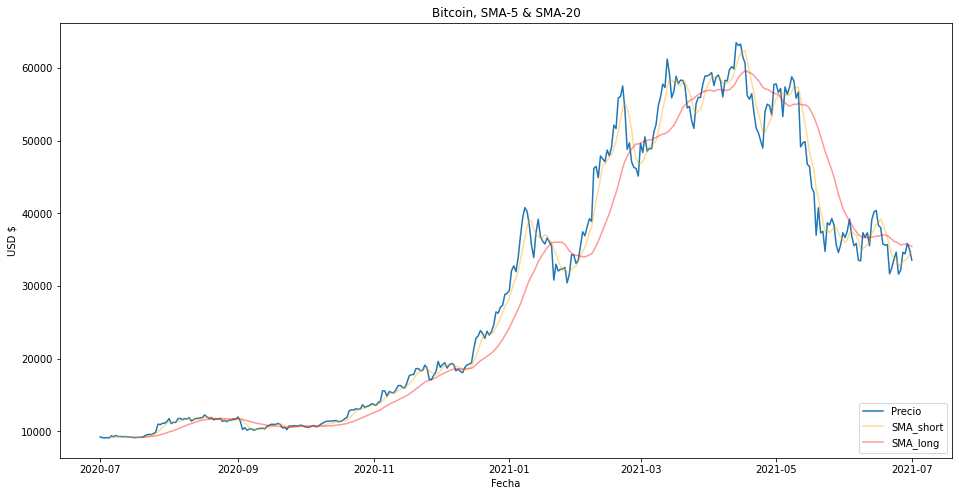

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Bitcoin, SMA-5 & SMA-20')
plt.plot(df['Adj Close'])
plt.plot(df['SMA_short'], alpha=0.4, color='orange')
plt.plot(df['SMA_long'], alpha=0.4, color='red')
plt.xlabel('Fecha')
plt.ylabel('USD $')
plt.legend(['Precio', 'SMA_short', 'SMA_long'],loc='lower right',)
plt.show()

## 4. Análisis Técnico - Media móvil exponencial (EMA)

In [ ]:
# Media móvil exponencial (EMA)
df['EMA_short'] = df['Adj Close'].ewm(span=5, adjust=False).mean()
df['EMA_long'] = df['Adj Close'].ewm(span=20, adjust=False).mean()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_long,EMA_short,EMA_long
Date,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455
...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969653
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099776
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735734


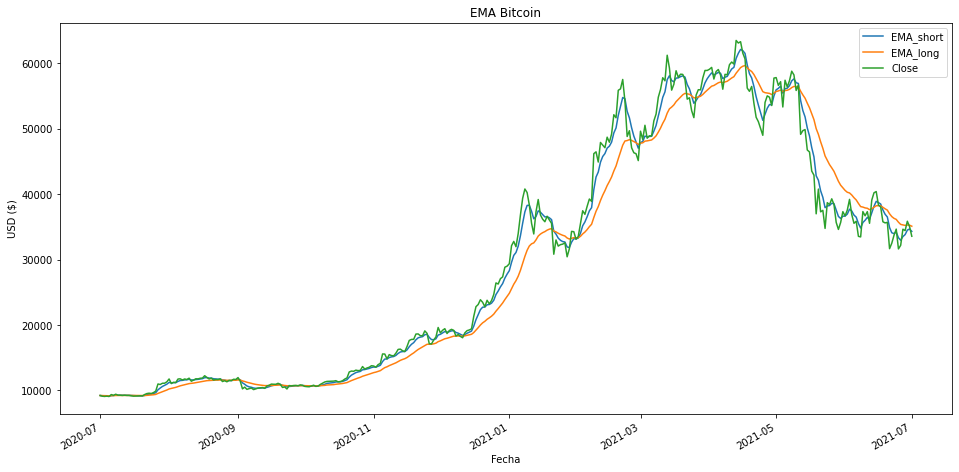

In [ ]:
#Plot the chart
column_list = ['EMA_short', 'EMA_long', 'Close']
df[column_list].plot(figsize=(16,8)) 
plt.title('EMA Bitcoin')
plt.ylabel('USD ($)')
plt.xlabel('Fecha')
plt.show()



## 5. Análisis Técnico - Bandas Bollinger


In [ ]:
pip install ta

In [ ]:
from ta.volatility import BollingerBands

In [ ]:
BollingerBands?

In [ ]:
# Inicializar indicador de bandas de Bollinger
indicator_bb = BollingerBands(close=df["Close"], window=20, window_dev=2)
# Agregar Bandas de Bollinger
df['bb_bbm'] = indicator_bb.bollinger_mavg()
df['bb_bbh'] = indicator_bb.bollinger_hband()
df['bb_bbl'] = indicator_bb.bollinger_lband()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_long,EMA_short,EMA_long,bb_bbm,bb_bbh,bb_bbl
Date,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969653,35733.668555,41012.715513,30454.621597
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099776,35781.753711,40994.649699,30568.857723
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735734,35707.886523,40871.714138,30544.058909


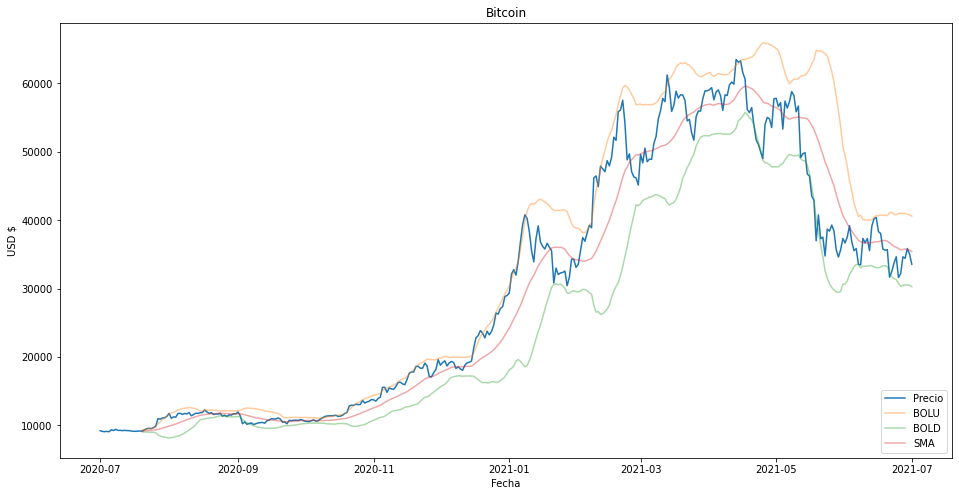

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Bitcoin')
plt.plot(df['Adj Close'])
plt.plot(df['bb_bbh'], alpha=0.4)
plt.plot(df['bb_bbl'], alpha=0.4)
plt.plot(df['bb_bbm'], alpha=0.4)
plt.xlabel('Fecha')
plt.ylabel('USD $')
plt.legend(['Precio', 'BOLU', 'BOLD', 'SMA'],loc='lower right',)
plt.show()

## 6. Análisis Técnico - Media móvil de convergencia / divergencia (MACD)

In [ ]:
from ta.trend import MACD

In [ ]:
# Moving Average Convergence Divergence (MACD)
df['MACD'] = MACD(close=df["Close"],window_fast=12, window_slow=26).macd()
df

,Open,High,Low,Close,Adj Close,Volume,SMA_short,SMA_long,EMA_short,EMA_long,bb_bbm,bb_bbh,bb_bbl,MACD
Date,,,,,,,,,,,,,,
2020-07-01,9145.985352,9309.754883,9104.735352,9228.325195,9228.325195,15971550355,NaN,NaN,9228.325195,9228.325195,NaN,NaN,NaN,NaN
2020-07-02,9231.139648,9274.962891,9036.623047,9123.410156,9123.410156,16338916796,NaN,NaN,9193.353516,9218.333287,NaN,NaN,NaN,NaN
2020-07-03,9124.842773,9202.344727,9058.794922,9087.303711,9087.303711,13078970999,NaN,NaN,9158.003581,9205.854280,NaN,NaN,NaN,NaN
2020-07-04,9084.233398,9183.295898,9053.629883,9132.488281,9132.488281,12290528515,NaN,NaN,9149.498481,9198.867042,NaN,NaN,NaN,NaN
2020-07-05,9126.090820,9162.183594,8977.015625,9073.942383,9073.942383,12903406143,9129.093945,NaN,9124.313115,9186.969455,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-27,32287.523438,34656.128906,32071.757812,34649.644531,34649.644531,35511640894,33371.833203,35733.668555,33524.823530,35314.969653,35733.668555,41012.715513,30454.621597,-1733.086974
2021-06-28,34679.121094,35219.890625,33902.074219,34434.335938,34434.335938,33892523752,33514.094922,35781.753711,33827.994332,35231.099776,35781.753711,40994.649699,30568.857723,-1598.846596
2021-06-29,34475.558594,36542.109375,34252.484375,35867.777344,35867.777344,37901460044,33755.162891,35707.886523,34507.922003,35291.735734,35707.886523,40871.714138,30544.058909,-1361.103434


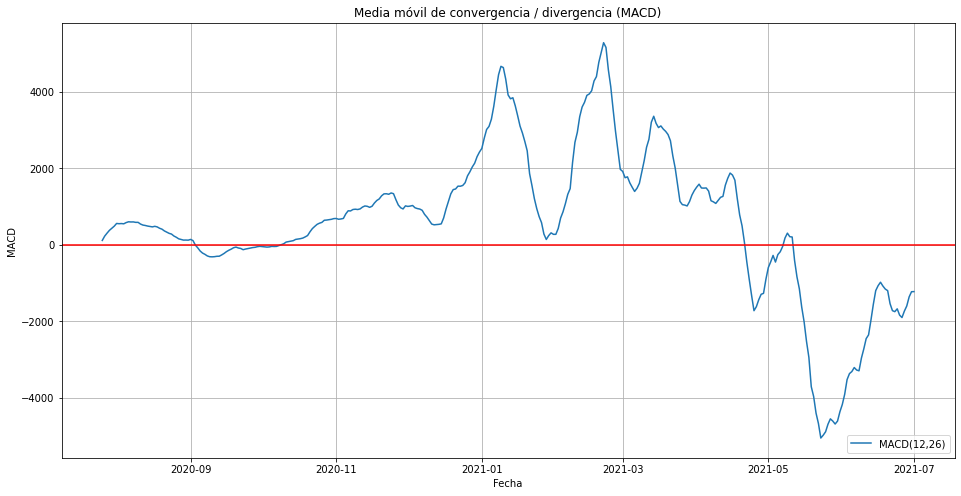

In [ ]:
plt.figure(figsize=(16,8))
plt.title ('Media móvil de convergencia / divergencia (MACD)')
plt.plot(df['MACD'])
plt.xlabel('Fecha')
plt.ylabel('MACD')
plt.legend(['MACD(12,26)'],loc='lower right',)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.grid()
plt.show()

## 7. Análisis Técnico - Retrosesos de Fibonacci 

In [ ]:
# Calcule los retrocesos de Fibonacci 
# Las razones de Fibonacci son 0.236, 0.382 y 0.618
maximum_price = df['Close'].max()
minimum_price = df['Close'].min()

r_fibo = np.array([0.236, 0.382, 0.5, 0.618])
levels = maximum_price - difference*r_fibo

difference = maximum_price - minimum_price
first_level = maximum_price - difference*0.236
second_level = maximum_price - difference*0.382
third_level = maximum_price - difference*0.500
fourth_level = maximum_price  - difference *0.618

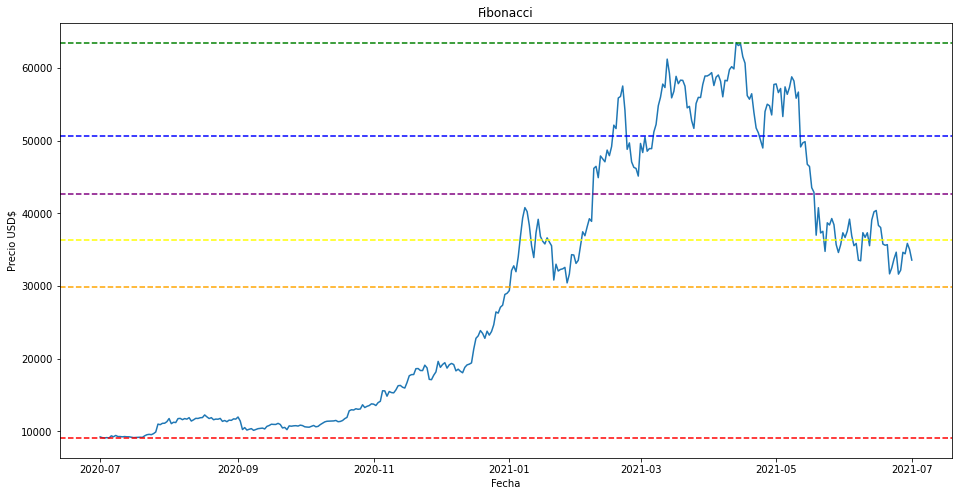

In [ ]:
#Plot the Fibonacci Level prices along with the close price
new_df = df
plt.figure(figsize=(16,8))
plt.title('Fibonacci')
plt.plot(df['Close'])
plt.axhline(maximum_price, linestyle='--', alpha = 0.6, color='green')
plt.axhline(first_level, linestyle='--', alpha = 0.6, color='blue')
plt.axhline(second_level, linestyle='--', alpha = 0.6, color='purple')
plt.axhline(third_level, linestyle='--', alpha = 0.6, color='yellow')
plt.axhline(fourth_level, linestyle='--', alpha = 0.6, color='orange')
plt.axhline(minimum_price, linestyle='--', alpha = 0.6, color='red')
plt.xlabel('Fecha')
plt.ylabel('Precio USD$')
plt.show()